In [36]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from icecream import ic

In [37]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

In [43]:
# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
# ic(X)
# ic(X.shape)
y = torch.from_numpy(y_numpy.astype(np.float32))
ic(y)
ic(y.shape)
y = y.view(y.shape[0], 1)
ic(y)
ic(y.shape)

ic| y: tensor([-126.2492,   50.9288,   63.1546,    6.0547,   -5.7295,   -2.7519,
                 58.7036,   53.8136,  -95.3411,   24.6481,  -59.4170,  -73.4235,
               -104.1627,   31.8077,  171.1535,  -67.7520,  141.4677,  -24.3676,
                 -2.1124,  -32.5958,  -29.4151,  -37.8715, -101.8983,   46.4129,
               -181.3484,  -31.7740,   24.1315,  163.9438,   10.7737,   37.3589,
                  0.9804, -120.8857,  138.1994,    9.2027,  -16.2069,   33.2171,
                -45.6170,   -1.7776, -105.5628,    5.2639,   89.5979,  146.1030,
                -77.7870,   -3.8089,   60.8120,  -97.2027,   -1.1599,  -43.8825,
                 15.7428,  -24.2745,  -90.6015,  -19.0731, -101.7900,  -56.5514,
                 52.1697, -158.2847,   64.5397,   84.5210,   66.4343,   36.8660,
                 37.4378,  -82.9171,  -21.4183,   -5.5435,   59.8845,    8.3785,
                -17.1763, -160.5090, -100.7372,   80.3034,   69.6496,   28.1444,
                  9.7630,   

torch.Size([100, 1])

In [29]:
n_samples, n_features = X.shape

In [30]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [31]:
# 2) Loss and optimizer
learning_rate = 0.01

In [32]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [33]:
# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4032.4199
epoch: 20, loss = 2842.7344
epoch: 30, loss = 2031.6061
epoch: 40, loss = 1478.4630
epoch: 50, loss = 1101.1731
epoch: 60, loss = 843.7776
epoch: 70, loss = 668.1429
epoch: 80, loss = 548.2742
epoch: 90, loss = 466.4501
epoch: 100, loss = 410.5854


In [34]:
# Plot
predicted = model(X).detach().numpy()

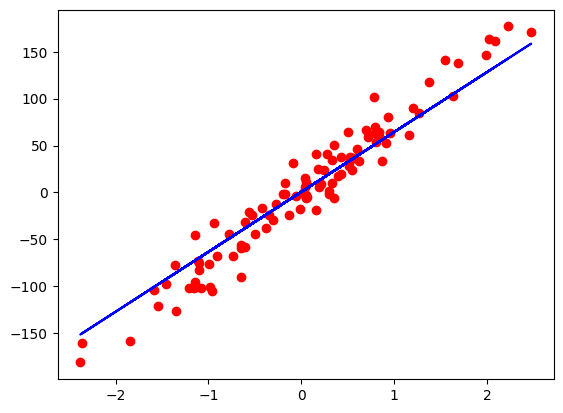

In [35]:
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()